# European Industrial Electricity Price Projection Script

**Created**: Wed Jan 24 2024

**Prerequisites**:
- Python version: 3.9.12

## Overview
This JupyterLab notebook is supplementary material for the research paper "Effects of emissions caps on the costs and feasibility of low-carbon hydrogen in the European ammonia industry". It is designed to project the industrial electricity prices in Europe up to the year 2050. It employs a combination of Geometric Brownian Motion (GBM) for modeling price dynamics and Monte Carlo simulation for uncertainty analysis and scenario generation.

## Methodology

The projection model is based on two key stochastic processes:
- **Geometric Brownian Motion (GBM)**: Used to simulate the continuous evolution of electricity prices over time, accounting for drift and volatility inherent in the market.
- **Monte Carlo Simulation**: Facilitates the exploration of a wide range of possible future outcomes by performing a large number of simulations with random inputs, based on the GBM model.

## Objectives

The main goals of the script are to:

- Model the stochastic behavior of electricity prices.
- Generate future price scenarios for industrial users in Europe.
- Provide a probabilistic understanding of future price movements up to 2050.

### Corresponding Author
**S. Mingolla**
**Email**: smingolla@connect.ust.hk

In [5]:
import numpy as np 
import pandas as pd
from scipy.stats import norm
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv(r"electricity-industry-ret.csv")
df = df.drop(columns=['Category', 'Unnamed: 1', 'Unnamed: 2', 'Iceland'])
df.head()

,EU_AVG,EU - Max,EU - Min,Austria,Belgium,Bulgaria,Cyprus,Czech_Republic,Germany,Denmark,...,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,UK,Switzerland,Norway
0,111.72,166.79,54.44,NaN,93.87,55.11,132.20,NaN,106.11,99.54,...,100.13,86.50,NaN,87.0,68.74,87.17,120.33,78.19,93.07,66.43
1,112.80,166.79,54.44,NaN,101.14,55.11,135.12,NaN,106.40,99.54,...,NaN,94.02,120.77,87.0,NaN,84.83,120.33,NaN,NaN,NaN
2,106.86,166.79,53.23,102.92,104.79,55.11,135.25,102.77,106.40,99.54,...,100.32,94.02,120.77,87.0,68.34,84.83,120.33,86.48,NaN,58.04
3,107.78,172.30,53.23,102.92,106.68,55.11,134.85,102.77,106.70,100.01,...,100.35,92.66,120.77,87.0,68.39,84.83,120.33,88.28,NaN,55.38
4,107.92,172.30,53.23,102.98,107.47,55.11,135.62,102.77,106.84,100.01,...,100.41,94.39,120.77,87.0,68.07,84.83,120.33,88.28,NaN,53.81


In [7]:
df['Date'] = pd.date_range(start='1/2008', end='1/2020', freq='M')
df = df.fillna(df.mean())
df.set_index('Date', inplace=True)

C:\Users\stefa\AppData\Local\Temp\ipykernel_18476\1848028851.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())


In [8]:
df.tail()

,EU_AVG,EU - Max,EU - Min,Austria,Belgium,Bulgaria,Cyprus,Czech_Republic,Germany,Denmark,...,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,UK,Switzerland,Norway
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,113.53,182.50,58.29,94.22,96.96,81.19,158.15,73.76,126.37,64.59,...,84.34,75.39,144.25,92.78,58.29,78.98,122.57,133.42,109.763333,54.27
2019-09-30,113.39,181.85,57.75,94.22,96.84,81.19,163.47,73.76,126.48,63.69,...,84.46,75.39,144.25,92.78,57.75,79.75,122.57,133.42,109.763333,52.34
2019-10-31,114.11,184.30,58.57,94.22,97.73,81.19,168.23,73.76,126.48,67.01,...,84.36,75.39,144.43,92.78,58.57,80.12,122.57,130.60,109.763333,55.45
2019-11-30,114.22,184.78,60.26,94.22,97.93,81.19,172.18,74.83,126.60,67.63,...,84.51,75.39,144.43,92.78,60.26,80.01,122.57,130.60,109.763333,58.24
2019-12-31,113.87,185.11,58.83,94.22,97.12,81.19,169.64,75.39,126.84,67.90,...,84.24,75.39,144.59,93.41,58.83,81.04,122.57,130.60,109.763333,56.41


In [12]:
country = 'Austria'

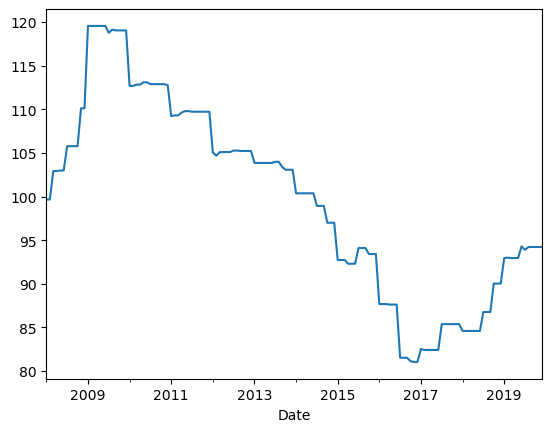

In [13]:
df[country].plot()
plt.show()

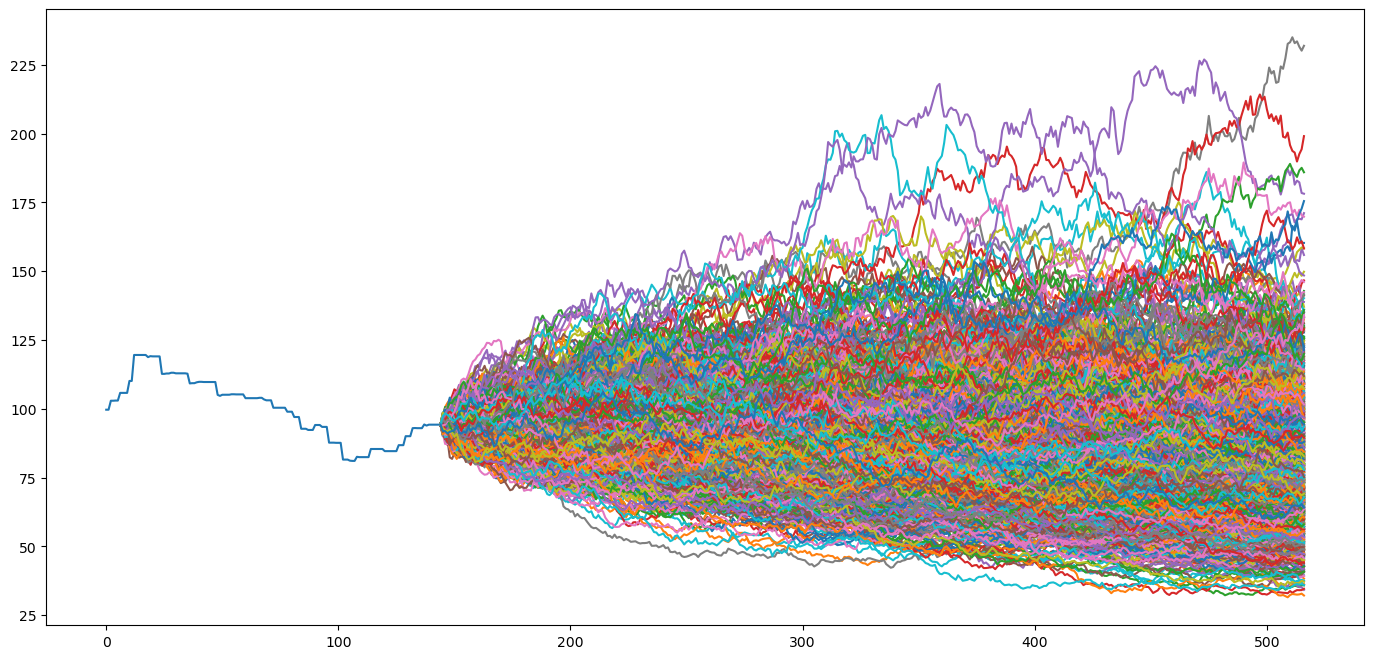

Mean Results: 88.83337025459973
[[ 94.22        94.22        94.22       ...  94.22        94.22
   94.22      ]
 [ 91.99824027  92.70939929  93.95183812 ...  93.02928615  97.3232193
   91.99824027]
 [ 91.85696428  93.06304276  91.11269793 ...  92.15003963  98.33333183
   91.85696428]
 ...
 [ 64.62429594  39.60113445 106.30866965 ...  69.17239558  65.02885932
   64.62429594]
 [ 65.39258567  39.16673246 106.9547627  ...  68.56610495  66.50664386
   65.39258567]
 [ 64.06425803  38.27690863 105.78747678 ...  69.14421081  67.817059
   64.06425803]]


In [14]:
# Calculate number of months from the end of 2019 until the end of 2050
start_date = pd.Timestamp('2019-12-31')
end_date = pd.Timestamp('2050-12-31')
t_intervals = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Other parameters
iterations = 1000  # Run 10 different forecasts

# Calculate logarithmic returns
log_returns = np.log(1 + df[country].pct_change())

# Parameters for GBM
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

# Simulate the annual changes
annual_change = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

# Create a variable (SO) equal to the last closing price
last_price = df[country].iloc[-1]

# Initialize price array and set initial value
price_value = np.zeros_like(annual_change)
price_value[0] = last_price

# Generate simulated paths
for t in range(1, t_intervals):
    price_value[t] = price_value[t - 1] * annual_change[t]

# Combine with historical data
price_value = pd.DataFrame(price_value)
price_value[country] = price_value[0]

frames = [df[country], price_value]
monte_carlo_forecast = pd.concat(frames)

# Plotting
monte_carlo = monte_carlo_forecast.iloc[:, :].values
plt.figure(figsize=(17, 8))
plt.plot(monte_carlo)
plt.show()

# Analyzing results
results_monte_carlo = monte_carlo[-t_intervals:]  # Select only the forecasted points
mean_results = results_monte_carlo.mean()

print(f"Mean Results: {mean_results}")
print(results_monte_carlo)

In [16]:
# Find nearest date to the target date
def nearest_date(array, target_date):
    target_date = np.datetime64(target_date)
    idx = np.argmin(np.abs(array - target_date))
    return idx

# Get the indices corresponding to the date range
start_idx = nearest_date(forecast_dates, '2024-01-31')  # Adjusted to end of January
end_idx = nearest_date(forecast_dates, '2050-12-31')  # End of December

# Calculate the average for each percentile over the date range
avg_5 = np.mean(p_5[start_idx:end_idx+1])
avg_50 = np.mean(p_50[start_idx:end_idx+1])
avg_95 = np.mean(p_95[start_idx:end_idx+1])

print(f"Average electricity price from 2024 to 2050 for the 5th percentile: {avg_5} EUR/MWh")
print(f"Average electricity price from 2024 to 2050 for the 50th percentile: {avg_50} EUR/MWh")
print(f"Average electricity price from 2024 to 2050 for the 95th percentile: {avg_95} EUR/MWh")

Average electricity price from 2024 to 2050 for the 5th percentile: 60.118254183475756 EUR/MWh
Average electricity price from 2024 to 2050 for the 50th percentile: 86.18549205530323 EUR/MWh
Average electricity price from 2024 to 2050 for the 95th percentile: 122.69352605249766 EUR/MWh


---

In [17]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Calculate number of months from the end of 2019 until the end of 2050
start_date = pd.Timestamp('2019-12-31')
end_date = pd.Timestamp('2050-12-31')
t_intervals = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Other parameters
iterations = 1000  # Run 10 different forecasts

# Function to find nearest date to the target date
def nearest_date(array, target_date):
    target_date = np.datetime64(target_date)
    idx = np.argmin(np.abs(array - target_date))
    return idx

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['5th_percentile', '50th_percentile', '95th_percentile'], index=df.columns)

# Loop over each column in the DataFrame
for country in df.columns:

    # Calculate logarithmic returns
    log_returns = np.log(1 + df[country].pct_change())

    # Parameters for GBM
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5 * var)
    stdev = log_returns.std()

    # Simulate the annual changes
    annual_change = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    # Create a variable (SO) equal to the last closing price
    last_price = df[country].iloc[-1]

    # Initialize price array and set initial value
    price_value = np.zeros_like(annual_change)
    price_value[0] = last_price

    # Generate simulated paths
    for t in range(1, t_intervals):
        price_value[t] = price_value[t - 1] * annual_change[t]

    # Calculate percentiles
    p_5 = np.percentile(price_value, 5, axis=1)  # 5th percentile
    p_50 = np.percentile(price_value, 50, axis=1)  # 50th percentile
    p_95 = np.percentile(price_value, 95, axis=1)  # 95th percentile

    # Create a date range for the forecast period
    forecast_dates = pd.date_range(start='2020-01-01', periods=t_intervals, freq='M')

    # Get the indices corresponding to the date range
    start_idx = nearest_date(forecast_dates, '2024-01-31')  # Adjusted to end of January
    end_idx = nearest_date(forecast_dates, '2050-12-31')  # End of December

    # Calculate the average for each percentile over the date range
    avg_5 = np.mean(p_5[start_idx:end_idx+1])
    avg_50 = np.mean(p_50[start_idx:end_idx+1])
    avg_95 = np.mean(p_95[start_idx:end_idx+1])

    # Store the results in the DataFrame
    results_df.loc[country] = [avg_5, avg_50, avg_95]

# Print the results DataFrame
print(results_df)

               5th_percentile 50th_percentile 95th_percentile
EU_AVG              90.779055      115.961449      148.354503
EU - Max           130.108146      205.865046      340.966085
EU - Min            37.110672       62.874843      107.492318
Austria             59.115889        85.21346      122.008718
Belgium             38.865712       87.987908      204.928604
Bulgaria            64.129916      136.152898      286.794582
Cyprus              36.833838      154.968017      779.432859
Czech_Republic      30.502787        56.11421      107.165259
Germany            121.315428      162.922995      219.082147
Denmark               19.8852       36.813803       71.816488
Estonia             52.502184      109.825843      247.127986
Greece              42.156443       83.672504      168.657572
Spain               28.975245       64.022415      147.355896
Finland             61.686586       85.383165      119.026923
France              64.228989      130.157778      275.328804
Croatia 